# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

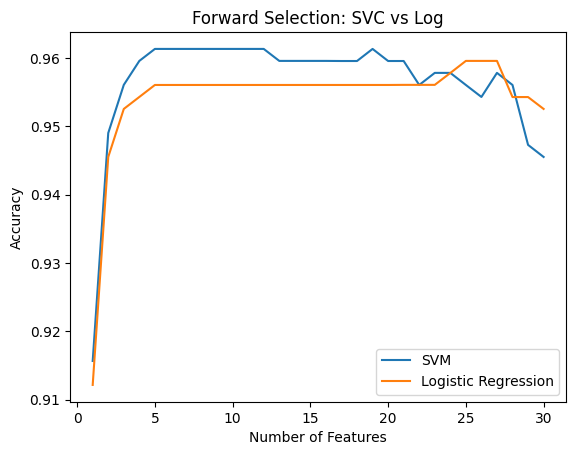

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
def forward_selection(X, y, model, max_features=30):
    selected_features = []
    remaining_features = list(range(X.shape[1]))
    scores = []
    for i in range(max_features):
        best_score = -1
        best_priz = None
        for priz in remaining_features:
            current_features = selected_features + [priz]
            X_subset = X[:, current_features]

            score = cross_val_score(model, X_subset, y, cv=5, scoring='accuracy').mean() # хорошо или плохо
            if score > best_score:
                best_score = score
                best_priz = priz
        selected_features.append(best_priz) #круто
        remaining_features.remove(best_priz)
        scores.append(best_score)
    return selected_features, scores


svm = SVC(kernel='linear')
log = LogisticRegression(max_iter=10000)

svm_selected, svm_scores = forward_selection(X, y, svm)
logreg_selected, logreg_scores = forward_selection(X, y, log)


plt.plot(range(1, len(svm_scores)+1), svm_scores, label='SVM')
plt.plot(range(1, len(logreg_scores)+1), logreg_scores, label='Logistic Regression')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Forward Selection: SVC vs Log')
plt.show()


# Backward elimination (2pts)

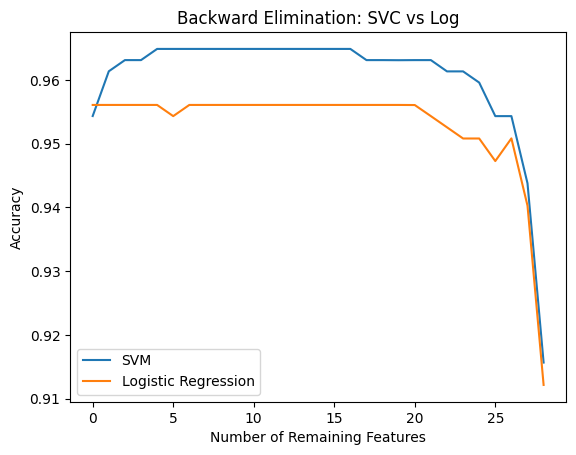

In [11]:
import time
import random
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

svm = SVC(kernel='linear')
log = LogisticRegression(max_iter=10000) # Модели, которые будут обучаться

def backward_elimination(X, y, model, min_features=1):
    remaining_features = list(range(X.shape[1]))
    scores = []

    while len(remaining_features) > min_features:
        best_score = -1
        worst_priz = None

        for priz in remaining_features:
            current_features = [f for f in remaining_features if f != priz]
            X_subset = X[:, current_features]
            score = cross_val_score(model, X_subset, y, cv=5, scoring='accuracy').mean()

            if score > best_score:
                best_score = score
                worst_priz = priz
        remaining_features.remove(worst_priz)
        scores.append(best_score)
    return remaining_features, scores

svm_selected, svm_scores = backward_elimination(X, y, svm, min_features=1)
logreg_selected, logreg_scores = backward_elimination(X, y, log, min_features=1)

plt.plot(range(len(svm_scores)), svm_scores, label='SVM')
plt.plot(range(len(logreg_scores)), logreg_scores, label='Logistic Regression')
plt.xlabel('Number of Remaining Features')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Backward Elimination: SVC vs Log')
plt.show()


# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

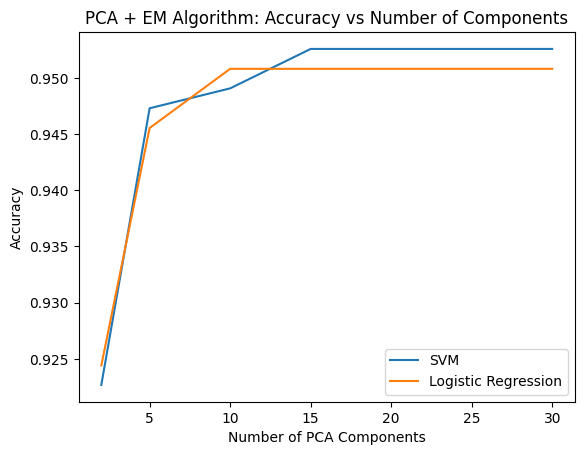

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

def apply_pca_and_em(X, y, n_components_list, model_type):
    accuracy_scores = []
    for n_components in n_components_list:
        pca = decomposition.PCA(n_components=n_components)
        X_reduced = pca.fit_transform(X)

        gmm = GaussianMixture(n_components=2, random_state=40) #EM - прикооооол
        gmm.fit(X_reduced)
        y_pred = gmm.predict(X_reduced)

        if model_type == 'svm': model = SVC(kernel='linear')
        else: model = LogisticRegression(max_iter=10000)

        score = cross_val_score(model, X_reduced, y, cv=5, scoring='accuracy').mean()
        accuracy_scores.append(score)

    return accuracy_scores

n_components_list = [2, 5, 10, 15, 20, 25, 30]

svm_scores = apply_pca_and_em(X, y, n_components_list, 'svm')
logreg_scores = apply_pca_and_em(X, y, n_components_list, 'logreg')

plt.plot(n_components_list, svm_scores, label='SVM')
plt.plot(n_components_list, logreg_scores, label='Logistic Regression')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.title('PCA + EM Algorithm: Accuracy vs Number of Components')
plt.show()


#  Выводы (1pts)

In [ ]:
Я даже понял формулу которая выше! Ну, примерно. Надо будет заботать это летом, интересно, я ж математик
 (кстати да, не судите строго, это все делалось с горем пополам).
Насколько я понял результаты которые мне дали, много признаков это плохо - там все идет на понижение. Мало признаков тоже плохо, потому что там изначально
значения маленькие. Нужен баланс.
Возвращаясь к работе. Forward попадает под эту теорию, с backward же сотворилось что-то странное (наверное надо cv поменьше), он вначале шел отлично,
а в конце оба алгоритма упали.
PCA же показал себя хорошо - как и ожидалось, он убирает шумы и в конце обе модели шли ровно, при этом SVM лучше. Вывод - юзайте PCA


